In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tips=sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [3]:
tips["sex_str"]=tips["sex"].astype(str)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [4]:
tsm=tips.head(10)

In [5]:
tsm.loc[[1,3,5,7],"total_bill"]="missing"
tsm

C:\Users\student\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [6]:
tsm.dtypes    #float => object로 변경됨 : missing이라는 문자가 포함되어졌기 때문

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [7]:
#tsm["total_blil"].astype(float)
tsm["total_bill"]=pd.to_numeric(tsm["total_bill"], errors="raise") #coerce: 숫자로 변환할 수 없는 값은 NaN으로 지정
                                                                   #ignore: 오류 무시하고 실행
                                                                    


ValueError: Unable to parse string "missing" at position 1

In [ ]:
tsm.dtypes

In [ ]:
tips["sex"]=tips["sex"].astype("str") #메모리: 10.7KB
tips.info()

In [ ]:
tips["sex"]=tips["sex"].astype("category") #메모리 : 9.5KB
tips.info()                                #category 가 메모리 효율성 높음

In [ ]:
word="Hello"
sent="world"
sent[-1]
sent[2:-1] #rl #마지막 d 참조 안됨

In [ ]:
"Hello world".capitalize()
"Hello world".count("o") 
"Hello world".startswith("Hello") #시작문자 참조
"Hello world".endswith("world") #끝문자 참조
"Hello world".find("l") #ㅣ문자가 나오는 인덱스 출력
"Hello world".find("z") #검색하는 문자가 없을 경우 -1 출력
"Hello world".index("z") #에러 출력

In [ ]:
"Hello world".isalpha() #영문자만 있니?=>공백이 포함되어 있기 때문에 False
"130".isdecimal() #숫자만 있니?

In [ ]:
"Hello world".upper() #대문자
"Hello world".lower() #소문자

In [ ]:
"Hello world".replace("Hello","Hi") #replace: 문자 대체
" Hello world ".strip() #양 쪽 공백 제거
"Hi Hi Hi".split(sep=" ") #공백(sep=" ") 기준으로 문자열 쪼개기
"9".zfill(5) #설정 숫자 자리 만큼 출력, 공백 0으로 채우기

In [ ]:
#join : 문자열 연결
d1="40"
d2="50"
d3="60"
d4="Number"
" ".join([d1,d2,d3,d4]) #각 문자열을 " "만큼 띄어서 이어붙이기

In [ ]:
#splitness: 여러줄로 구성된 문자열을 분리

mystr="""
A:Hello
B:I'm
C:Fine
D:How are you?
"""
msr=mystr.splitlines()
msr

In [ ]:
msr2=msr[::2]
msr2

In [ ]:
#포매팅
a="hi"
s="hello{}"
s.format(a)

In [ ]:
myhome="location:{lat},{lon}"
myhome.format(lat="36",lon="100")

In [ ]:
s="%d digits of pi" %3
s

In [ ]:
print("some digits of %(co)s : %(val).2f" %{"co":"e","val":2.718})

In [ ]:
#apply매서드

df=pd.DataFrame({"a":[1,2,3],
              "b":[2,2,3]
             })

In [ ]:
df

In [ ]:
def my_sq(x):
    return x**2
def my_exp(x,n):
    return x**n

In [ ]:
df["a"].apply(my_sq) #a열에 대해 my_seq함수 적용

In [ ]:
df["a"].apply(my_exp,n=3) #함수 인자가 2개 이상일 경우는 따로 apply안에 값 지정

In [ ]:
def print_me(x):
    print(x)

In [ ]:
df.apply(print_me)

In [ ]:
def myavg_apply(data):
    x=data[0]
    y=data[1]
    z=data[2]
    return (x+y+z)/3   

In [ ]:
df.apply(myavg_apply)

## titanic 데이터 활용 

In [8]:
titanic=sns.load_dataset("titanic")
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
def count_missing(data):
    #각 컬럼별 누락값의 개수를 리턴
    return data.isnull().sum()

def prop_missing(vec):
    num=vec.size
    miss=count_missing(vec)
    return miss/num

def prop_complete(vec):
    return 1-prop_missing(vec)



In [ ]:
cm=titanic.apply(count_missing)
print(cm)
print("-----------------------------------")
pm=titanic.apply(prop_missing)
print(cm)
print("-----------------------------------")
pcm=titanic.apply(prop_complete)
print(pcm)

In [ ]:
cmr=titanic.apply(count_missing,axis=1)
pmr=titanic.apply(prop_missing,axis=1)
pcmr=titanic.apply(prop_complete,axis=1)

In [ ]:
titanic["num_missing"]=titanic.apply(count_missing,axis=1)
titanic

In [ ]:
titanic.loc[titanic.num_missing>1].sample(10)

## names 데이터 활용 

In [9]:
names2010=pd.read_csv("names/names/yob2010.txt", names=["name","sex","births"])
names2010

,name,sex,births
0,Isabella,F,22731
1,Sophia,F,20477
2,Emma,F,17179
3,Olivia,F,16860
4,Ava,F,15300
...,...,...,...
33833,Zymaire,M,5
33834,Zyonne,M,5
33835,Zyquarius,M,5
33836,Zyran,M,5


In [10]:
F_2010=names2010[names2010["sex"]=="F"]
M_2010=names2010[names2010["sex"]=="M"]
F_2010["births"].sum()
M_2010["births"].sum()

1898382

In [11]:
names2010.groupby("sex").sum()

,births
sex,
F,1759010
M,1898382


In [1]:
#names폴더 안 text파일 모두 불러오기

import pandas as pd
import numpy as np

pieces=[]
for year in range(1880,2011):
    path=("names/names/yob%d.txt" %year)
    df=pd.read_csv(path, names=["name","sex","births"])
    df["year"]=year
    pieces.append(df)
names=pd.concat(pieces, ignore_index=True)
names.head(20)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [2]:
total_births=pd.pivot_table(names, columns="sex", index="year", values="births", aggfunc=sum) #value의 default값: mean

In [3]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [4]:
total_births.plot(title="Total births")

In [5]:
#Mary의 이름 비율
def add_prop(group):
    births=group.births.sum()
    group["prop"]=group.births/births
    return group
    
names=names.groupby(["sex","year"]).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [22]:
# np.allclose(names.groupby(["year","sex"]), prop.sum(), 1)

In [6]:
#각 연도별, 성별에 따른 이름 빈도수가 가장 높은 이름을 1000개씩 추출

def get_top1000(group):
    return group.sort_index(by="births", ascending=False)[:1000]

grouped=names.groupby(["year","sex"])
top1000=grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
top1000

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [7]:
boys=top1000[top1000.sex=="M"]
girls=top1000[top1000.sex=="F"]
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [8]:
total_births=top1000.pivot_table("births", index="year", columns="name", aggfunc=sum) 
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#2010년도의 남자아이의 이름 비율 

df=boys[boys["year"]==2010]
prop_cumsum=df.sort_index(by="prop", ascending=False).prop.cumsum() #누적합
prop_cumsum[:10] #상위 10개의 누적합 : 0.089 
#결론: 1880년도랑 비교했을때 이름이 다양해짐
prop_cumsum.values.searchsorted(0.5)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


116

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


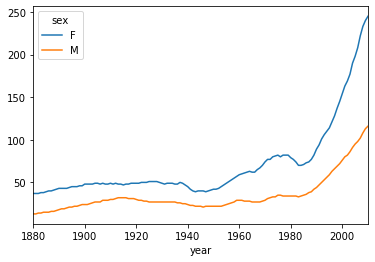

In [10]:
def get_qc(group,q=0.5):
    group=group.sort_index(by="prop", ascending=False)
    return group.prop.cumsum().values.searchsorted(q)
res=top1000.groupby(["year","sex"]).apply(get_qc)
res=res.unstack("sex")
res.plot()

In [16]:
total_births=top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


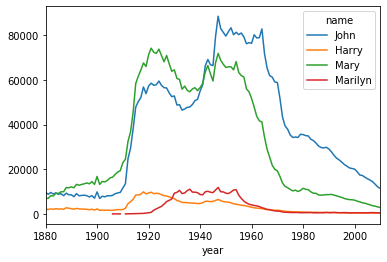

In [18]:
subset=total_births[["John","Harry","Mary","Marilyn"]]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E8E4A4988>,
      dtype=object)

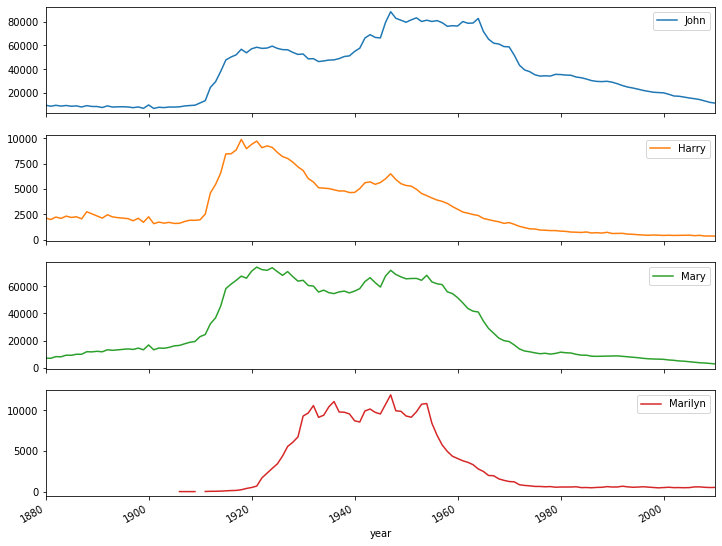

In [21]:
subset.plot(subplots=True, figsize=(12,10)) #선그래프 나눠서 출력

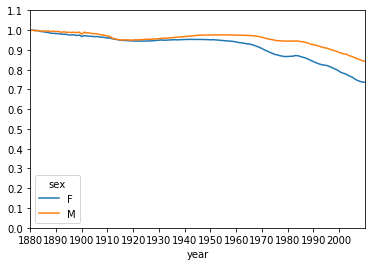

In [29]:
year_s_p=top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)
year_s_p.plot(yticks=np.linspace(0,1.1,12), xticks=range(1880,2010,10)) #x/yticks: x/y축 범위 재설정

In [37]:
df=boys[boys.year==2010]
prop_cumsum=df.sort_values(by="prop",ascending=False)["prop"].cumsum() #"prop"컬럼에만 대해서 누적합
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [39]:
prop_cumsum.values.searchsorted(0.5)

116

In [43]:
df=boys[boys.year==1900]
in1900=df.sort_values(by="prop",ascending=False)["prop"].cumsum()
in1900

40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
           ...   
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, Length: 1000, dtype: float64

In [47]:
def get_qc(group, q=0.5):
    group.sort_index(by="prop", ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity=top1000.groupby(["year","sex"]).apply(get_qc)
diversity


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [48]:
diversity=diversity.unstack("sex") #unstack("컬럼이름") 지정
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


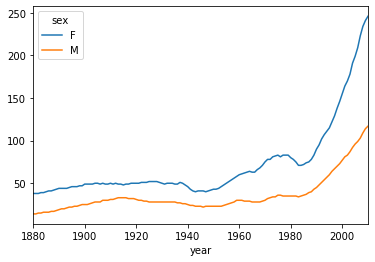

In [49]:
diversity.plot()

In [ ]:
#추가분석
#각 연도별 상위 50%이름들에 사용된 철자의 비율
#이름에 사용된 철자의 변화패턴?


In [59]:
#names 열에서 마지막 글자를 추출

name_l=names["name"]
res=[]
for name in name_l:
    name_end=name.endswith(name[-1])
    res.append(name_end)
print(res)  #런타임 에러

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
last_letters=names.name.map(lambda x:x[-1])
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [64]:
#각 이름 끝자리 알파벳별 births 갯수(columns=sex,year)
table=names.pivot_table("births", index=last_letters, columns=["sex","year"], aggfunc=sum)
table

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0  54353.0   
f         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g         7.0      5.0     12.0      8.0     24.0     11.0     18.0     25.0   
h      4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   7141.0   
i        61.0     78.0     81.0     76.0     84.0     92.0     85.0    105.0   
j         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k        13.0     15.0     11.0     17.0     21.0     18.0     27.0     19.0   
l      2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   6175.0   
m        58.0     57.0     81.0     86.0     79.0     75.0    103.0     90.0   
n      3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   5512.0   
o        30.0     49.0     35.0     47.0     74.0     84.0     93.0     97.0   
p         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r       481.0    417.0    590.0    640.0    718.0    799.0    917.0    910.0   
s      1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   2803.0   
t      2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   3140.0   
u       380.0    427.0    410.0    444.0    490.0    495.0    511.0    476.0   
v         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w         NaN      5.0      NaN      NaN      NaN      NaN      5.0      NaN   
x         NaN      NaN      NaN      7.0      NaN      NaN      NaN      NaN   
y     10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0  14980.0   
z       106.0     95.0    106.0    141.0    148.0    150.0    202.0    188.0   

sex                     ...         M                                          \
year     1888     1889  ...      2001      2002      2003      2004      2005   
name                    ...                                                     
a     59442.0  58631.0  ...   39124.0   38815.0   37825.0   38650.0   36838.0   
b         NaN      NaN  ...   50950.0   49284.0   48065.0   45914.0   43144.0   
c         NaN      NaN  ...   27113.0   27238.0   27697.0   26778.0   26078.0   
d      1298.0   1374.0  ...   60838.0   55829.0   53391.0   51754.0   50670.0   
e     66750.0  66663.0  ...  145395.0  144651.0  144769.0  142098.0  141123.0   
f         NaN      NaN  ...    1758.0    1817.0    1819.0    1904.0    1985.0   
g        44.0     28.0  ...    2151.0    2084.0    2009.0    1837.0    1882.0   
h      8630.0   8826.0  ...   85959.0   88085.0   88226.0   89620.0   92497.0   
i       141.0    134.0  ...   20980.0   23610.0   26011.0   28500.0   31317.0   
j         NaN      NaN  ...    1069.0    1088.0    1203.0    1094.0    1291.0   
k        21.0     22.0  ...   42477.0   42043.0   42296.0   41400.0   42151.0   
l      7900.0   8395.0  ...  153648.0  153493.0  153862.0  152800.0  155312.0   
m       123.0    137.0  ...   41967.0   42663.0   42790.0   43054.0   41600.0   
n      6833.0   7103.0  ...  616099.0  630322.0  663419.0  676011.0  686326.0   
o       134.0    142.0  ...   82146.0   83180.0   85423.0   88822.0   92001.0   
p         NaN      NaN  ...    3419.0    3157.0    2982.0    2841.0    2768.0   
q         NaN      NaN  ...     602.0     618.0     585.0     523.0     446.0   
r      1207.0   1214.0  ...  165377.0  164821.0  169878.0  

In [67]:
#reindex: "year"라는 컬럼에 대해서 인덱스 재지정
subtable=table.reindex(columns=[1900,1950,2010],level="year")
subtable

sex          F                            M                    
year      1900      1950      2010     1900      1950      2010
name                                                           
a      89934.0  576481.0  670605.0    870.0    4037.0   28438.0
b          NaN      17.0     450.0    372.0    1632.0   38859.0
c          NaN      16.0     946.0    299.0    6500.0   23125.0
d       3670.0    4413.0    2607.0  15499.0  263643.0   44398.0
e     107080.0  376863.0  313833.0  22731.0  168659.0  129012.0
f          NaN       NaN      97.0    116.0     851.0    2255.0
g         33.0     109.0     657.0    253.0    7437.0    2666.0
h      15303.0   77899.0  133424.0   6234.0   67926.0   98090.0
i        360.0   18111.0   55820.0    155.0     622.0   42956.0
j          NaN       NaN     159.0      NaN       5.0    1459.0
k         30.0     202.0     626.0   6074.0   55780.0   35198.0
l      14654.0   65088.0   46360.0   9317.0  172053.0  133583.0
m        307.0    1608.0    4552.0  10805.0   68846.0   46808.0
n      18269.0  251970.0  246631.0  20723.0  251831.0  688677.0
o        348.0    7248.0    2187.0   1770.0   19269.0   81025.0
p          NaN      36.0      35.0    432.0   11391.0    2409.0
q          NaN       NaN      53.0      NaN       NaN     342.0
r       3625.0    8398.0   31707.0  10288.0   61049.0  166064.0
s       9453.0   39035.0   23451.0  20059.0  241618.0  123670.0
t       6965.0   38183.0   13773.0  10265.0  122970.0   43398.0
u        350.0     918.0     734.0     27.0      77.0    2318.0
v          NaN       NaN     205.0     19.0      29.0    2723.0
w          6.0      42.0    2080.0    949.0    7028.0   30656.0
x          NaN      54.0    1279.0    528.0    3192.0   16352.0
y      28876.0  245709.0  205501.0  12746.0  253223.0  110425.0
z        610.0     601.0    1238.0     23.0     268.0    3476.0

In [69]:
subtable.sum(axis=1) #각 알파벳별 합계
subtable.sum() #성별별/연도별 태어난 아이 수 (births) 합계
# +1900년 남자아이, 여자아이 전체 수

sex  year
F    1900     299873.0
     1950    1713001.0
     2010    1759010.0
M    1900     150554.0
     1950    1789936.0
     2010    1898382.0
dtype: float64

In [82]:
#비율
letter_prop=subtable/subtable.sum()
letter_prop

sex          F                             M                    
year      1900      1950      2010      1900      1950      2010
name                                                            
a     0.299907  0.336533  0.381240  0.005779  0.002255  0.014980
b          NaN  0.000010  0.000256  0.002471  0.000912  0.020470
c          NaN  0.000009  0.000538  0.001986  0.003631  0.012181
d     0.012239  0.002576  0.001482  0.102946  0.147292  0.023387
e     0.357084  0.220002  0.178415  0.150982  0.094226  0.067959
f          NaN       NaN  0.000055  0.000770  0.000475  0.001188
g     0.000110  0.000064  0.000374  0.001680  0.004155  0.001404
h     0.051032  0.045475  0.075852  0.041407  0.037949  0.051670
i     0.001201  0.010573  0.031734  0.001030  0.000347  0.022628
j          NaN       NaN  0.000090       NaN  0.000003  0.000769
k     0.000100  0.000118  0.000356  0.040344  0.031163  0.018541
l     0.048867  0.037996  0.026356  0.061885  0.096122  0.070367
m     0.001024  0.000939  0.002588  0.071768  0.038463  0.024657
n     0.060922  0.147093  0.140210  0.137645  0.140693  0.362771
o     0.001160  0.004231  0.001243  0.011757  0.010765  0.042681
p          NaN  0.000021  0.000020  0.002869  0.006364  0.001269
q          NaN       NaN  0.000030       NaN       NaN  0.000180
r     0.012088  0.004903  0.018025  0.068334  0.034107  0.087477
s     0.031523  0.022787  0.013332  0.133235  0.134987  0.065145
t     0.023226  0.022290  0.007830  0.068182  0.068701  0.022861
u     0.001167  0.000536  0.000417  0.000179  0.000043  0.001221
v          NaN       NaN  0.000117  0.000126  0.000016  0.001434
w     0.000020  0.000025  0.001182  0.006303  0.003926  0.016148
x          NaN  0.000032  0.000727  0.003507  0.001783  0.008614
y     0.096294  0.143438  0.116828  0.084661  0.141470  0.058168
z     0.002034  0.000351  0.000704  0.000153  0.000150  0.001831

In [72]:
import matplotlib.pyplot as plt

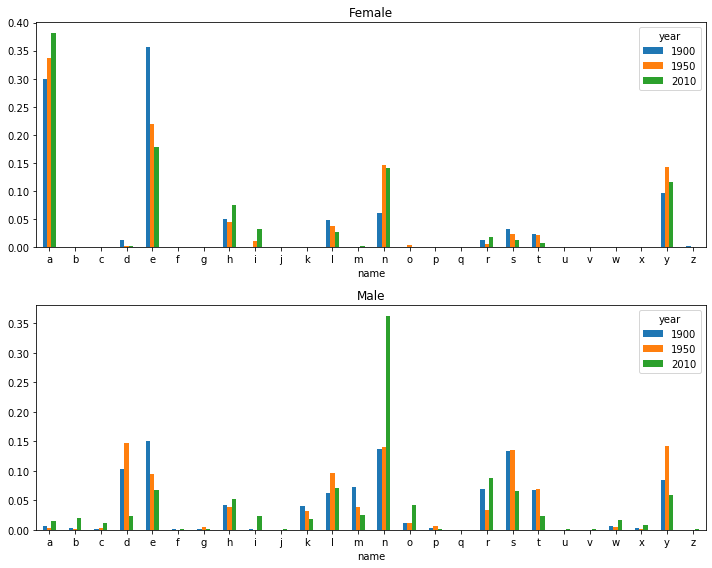

In [93]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[0], title="Female") #여자
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[1], title="Male") #남자
plt.tight_layout() #2개 이상 그래프 겹치는 부분없이 fit하게 맞추기

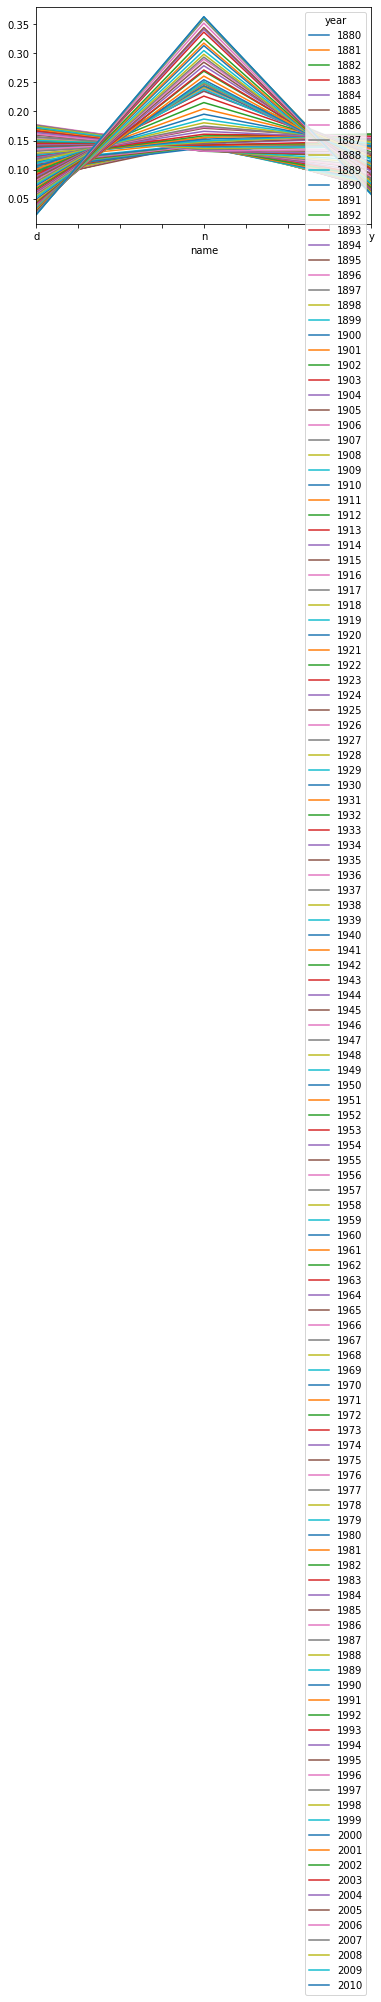

In [104]:
#d,n,y
letter_prop=table/table.sum()
dny_ts=letter_prop["M"].loc[["d","n","y"]]
dny_ts.plot()

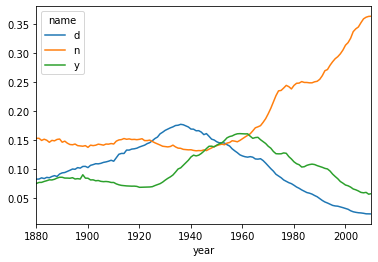

In [105]:
dny_ts=dny_ts.T
dny_ts.plot()

In [110]:
users=pd.read_csv("dataset/movielens/users.dat",sep="::", header=None, names=["user_id","gender","age","occupation","zip"])
users

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [111]:
movies=pd.read_csv("dataset/movielens/movies.dat",sep="::", header=None, names=["movie_id","title","genres"])
movies

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [112]:
ratings=pd.read_csv("dataset/movielens/ratings.dat",sep="::", header=None, names=["user_id","movie_id","ratings","timestamp"])
ratings

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [117]:
data=pd.merge(pd.merge(ratings,users),movies)

In [128]:
mean_ratings=data.pivot_table(index="title", columns="gender", values="ratings")

In [129]:
data

,user_id,movie_id,ratings,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [130]:
rating_by_title=data.groupby("title").size()
active_titles=rating_by_title[rating_by_title>=250].index 
#rating_by_title.index[rating_by_title>=250] #index 앞 위치 가능
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [132]:
"""
mean_ratings에서 active_title에 저장된 영화제목(rating: 250이상인 제목들)에 대한 데이터만 추출
"""
mean_ratings=mean_ratings.loc[active_titles]

In [142]:
#Female열에 대해 "rating 을 내림차순"
top_female_ratings=mean_ratings.sort_index(by="F", ascending=False)
top_female_ratings

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [166]:
mean_ratings["diff"]=mean_ratings["F"]-mean_ratings["M"]
mean_ratings

#F과 M의 rating차이가 큰것부터 내림차순
sorted_by_diff=mean_ratings.sort_values(by="diff", ascending=False)
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
Dumb & Dumber (1994),2.697987,3.336595,-0.638608


In [146]:
mean_rating["F"]

title
$1,000,000 Duck (1971)                        3.375000
'Night Mother (1986)                          3.388889
'Til There Was You (1997)                     2.675676
'burbs, The (1989)                            2.793478
...And Justice for All (1979)                 3.828571
                                                ...   
Zed & Two Noughts, A (1985)                   3.500000
Zero Effect (1998)                            3.864407
Zero Kelvin (Kj�rlighetens kj�tere) (1995)         NaN
Zeus and Roxanne (1997)                       2.777778
eXistenZ (1999)                               3.098592
Name: F, Length: 3706, dtype: float64

In [147]:
mean_rating["M"]

title
$1,000,000 Duck (1971)                        2.761905
'Night Mother (1986)                          3.352941
'Til There Was You (1997)                     2.733333
'burbs, The (1989)                            2.962085
...And Justice for All (1979)                 3.689024
                                                ...   
Zed & Two Noughts, A (1985)                   3.380952
Zero Effect (1998)                            3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.357143
eXistenZ (1999)                               3.289086
Name: M, Length: 3706, dtype: float64

In [175]:
rs_by_title=data.groupby("title")["ratings"].std()
rs_by_title=rs_by_title.loc[active_titles]
rs_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: ratings, Length: 1216, dtype: float64